In [2]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load files
# - lear: lear_slog_sparsity_test_2_train.tsv
# - dear = dear_slog_sparsity_test_1_train.tsv
# each file is one column per line, containing a json object

with open('lear_slog_sparsity_test_2_train.tsv', 'r') as f:
    lear_lines = f.readlines()
with open('dear_slog_sparsity_test_1_train.tsv', 'r') as f:
    dear_lines = f.readlines()

lear_data = [json.loads(line.replace("'",'"')) for line in lear_lines]
dear_data = [json.loads(line.replace("'",'"')) for line in dear_lines]

print(f"LEAR data samples: {len(lear_data)}")
print(f"DEAR data samples: {len(dear_data)}")

LEAR data samples: 1520
DEAR data samples: 1080


In [4]:
# sample a line from each
print("Sample LEAR data:")
print(json.dumps(lear_data[0], indent=2))
print("\nSample DEAR data:")
print(json.dumps(dear_data[0], indent=2))

Sample LEAR data:
{
  "input": "the girl lent abigail a pen that a cat shortened",
  "sentence_len": 6,
  "gold": "* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ 1 ) and lend . recipient ( x _ 2 , abigail ) and lend . theme ( x _ 2 , x _ 5 ) and pen ( x _ 5 ) and pen . nmod ( x _ 5 , x _ 9 ) and cat ( x _ 8 ) and shorten . agent ( x _ 9 , x _ 8 ) and shorten . theme ( x _ 9 , x _ 5 )",
  "output": [
    "lend",
    "None",
    "girl",
    "None",
    "ccomp",
    "shorten",
    "cat",
    "abigail",
    "pen"
  ],
  "processed_gold": [
    "lend",
    "girl",
    "pen",
    "abigail",
    "nmod",
    "shorten",
    "cat",
    "pen",
    "None"
  ],
  "sample_num": 0,
  "composer_output": [
    [
      [
        0,
        2
      ],
      [
        [
          1,
          1
        ],
        [
          2,
          2
        ]
      ]
    ],
    [
      [
        8,
        9
      ],
      [
        [
          8,
          8
        ],
        [
          9,
          9
        ]
 

In [5]:
# turn data into pandas dataframe for easier analysis
lear_df = pd.DataFrame(lear_data)
dear_df = pd.DataFrame(dear_data)

dear_df

,input,sentence_len,gold,output,processed_gold,sample_num,c_reward,s_reward
0,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","cat(shorten,relcl) lend(pen,theme) shorten(abi...","lend(girl,agent) lend(abigail,recipient) lend(...",0,0.307692,0.5
1,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","girl(abigail,in) pen(shorten,relcl) cat(lend,r...","lend(girl,agent) lend(abigail,recipient) lend(...",1,0.307692,1.0
2,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","girl(abigail,on) girl(shorten,relcl) girl(lend...","lend(girl,agent) lend(abigail,recipient) lend(...",2,0.307692,0.0
3,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","cat(abigail,in) pen(lend,relcl) lend(cat,theme...","lend(girl,agent) lend(abigail,recipient) lend(...",3,0.153846,0.0
4,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","shorten(pen,agent) cat(lend,relcl) cat(girl,be...","lend(girl,agent) lend(abigail,recipient) lend(...",4,0.500000,0.0
...,...,...,...,...,...,...,...,...
1075,a box was inflated,2,"box ( x _ 1 ) and inflate . theme ( x _ 3 , x ...","inflate(box,agent)","inflate(box,theme)",10,1.000000,0.0
1076,a box was inflated,2,"box ( x _ 1 ) and inflate . theme ( x _ 3 , x ...","box(inflate,relcl) inflate(box,theme)","inflate(box,theme)",11,0.666667,1.0
1077,a box was inflated,2,"box ( x _ 1 ) and inflate . theme ( x _ 3 , x ...","inflate(box,agent)","inflate(box,theme)",12,1.000000,0.0
1078,a box was inflated,2,"box ( x _ 1 ) and inflate . theme ( x _ 3 , x ...","box(inflate,relcl) inflate(box,theme)","inflate(box,theme)",13,0.666667,1.0


### LeAR: Catalan Number formula:

$$P_\text{LeAR}=\frac{(2n)!}{(n+1)!n!}$$

### DeAR: Exponential
$$P_\text{DeAR}=n^{n-2}$$

In [6]:
def catalan_number(n):
    if n == 0:
        return 1
    return sum(catalan_number(i) * catalan_number(n - 1 - i) for i in range(n))

def pos_lear(n):
    return catalan_number(n-1)

def pos_dear(n):
    return n**(n-2)

# test for values 2 to 10
print("Sentence Length | LEAR Pos | DEAR Pos")
for i in range(2, 13):
    print(f"{i:15} | {pos_lear(i):8,} | {pos_dear(i):14,}")

Sentence Length | LEAR Pos | DEAR Pos
              2 |        1 |              1
              3 |        2 |              3
              4 |        5 |             16
              5 |       14 |            125
              6 |       42 |          1,296
              7 |      132 |         16,807
              8 |      429 |        262,144
              9 |    1,430 |      4,782,969
             10 |    4,862 |    100,000,000
             11 |   16,796 |  2,357,947,691
             12 |   58,786 | 61,917,364,224


In [7]:
lear_df['final_semantic'][0]

{'children': [{'children': [], 'token': 'girl', 'rel': 'theme', 'class': 'E'},
  {'children': [{'children': [], 'token': 'cat', 'rel': 'agent', 'class': 'E'},
    {'children': [], 'token': 'pen', 'rel': 'recipient', 'class': 'E'},
    {'children': [], 'token': 'abigail', 'rel': 'theme', 'class': 'E'}],
   'token': 'shorten',
   'rel': 'ccomp',
   'class': 'P'}],
 'token': 'lend',
 'rel': '',
 'class': 'P'}

In [8]:
# Take process_gold method from DeAR

def process_gold(s):
    # Examples:
    # * cake ( x _ 8 ) ; cat ( x _ 1 ) AND cat . nmod ( x _ 1 , x _ 3 ) AND admire . agent ( x _ 3 , x _ 1 ) AND admire . ccomp ( x _ 3 , x _ 6 ) AND eat . agent ( x _ 6 , Emily ) AND eat . theme ( x _ 6 , x _ 8 )
    # * muffin ( x _ 4 ) ; * painting ( x _ 7 ) ; * girl ( x _ 10 ) ; mail . recipient ( x _ 2 , Emma ) AND mail . theme ( x _ 2 , x _ 4 ) AND mail . agent ( x _ 2 , x _ 10 ) AND muffin . nmod . beside ( x _ 4 , x _ 7 )

    # each edge will be a triplet of form (hed, dep, rel_name)
    # a predicate -> entity relation will look like (8, 1, "agent") (agent, theme, recipient)
    # a predicate -> predicate relation will look like (8, 6, "ccomp") (ccomp, xcomp)
    # an entity -> predicate relation will look like (1, 3, "relcl")
    # an entity -> entity relation will look like (1, 3, "in") (in, on, beside)
    edges = []
    variable_map = {}
    
    elements = s.replace(" and ", ";").split(";")
    for element in elements:
        # if there is an nmod, it can either be an nmod (if there is a preposition) or a relcl (if there is no preposition)
        # check for nmod first
        if ". nmod ." in element:
            # cake.nmod.on.x_4.x_7
            nmod = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            nmod = nmod.split(".")
            variable_map[nmod[3]] = nmod[0]
            nmod = nmod[-3:]
            # [on, x_4, x_7]
            nmod = [nmod[1], nmod[2], nmod[0]]
            nmod = [el.replace("x_", "") for el in nmod]
            # [4, 7, on]
            edges.append(nmod)

        # next, relcl
        elif ". nmod" in element:
            # cake.nmod.x_4.x_7
            relcl = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            relcl = relcl.split(".")
            variable_map[relcl[2]] = relcl[0]
            relcl = relcl[-2:]
            # [x_4, x_7]
            relcl = [el.replace("x_", "") for el in relcl] + ["relcl"]
            # [4, 7, relcl]
            edges.append(relcl)

        # else, if there is a comma, it is a predicate
        elif ',' in element:
            # study . agent ( x _ 2 , x _ 1 )
            predicate = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            # study.agent.x_2.x_1
            predicate = predicate.split(".")
            variable_map[predicate[2]] = predicate[0]
            predicate = predicate[-3:]
            # [agent, x_2, x_1]
            predicate = [predicate[1], predicate[2], predicate[0]]
            # [x_2, x_1, agent]
            predicate = [el.replace("x_", "") for el in predicate]
            # [2, 1, agent]
            edges.append(predicate)
            
        # if there is no comma, it is an entity, which we capture in variable_map
        else:
            # cake ( x _ 8 ) or * cake ( x _ 8 )
            element = element.replace(" ", "").replace("(",".").replace(")","").replace("*", "")
            # cake.x_8
            element = element.split(".")
            variable_map[element[1]] = element[0]

    # Now we go through the edges and replace the entities with their corresponding variables
    for i in range(len(edges)):
        for j in range(2):
            if edges[i][j].isnumeric():
                assert "x_" + edges[i][j] in variable_map, f"Entity {edges[i][j]} not found in variable_map: {variable_map}"
                edges[i][j] = variable_map["x_" + edges[i][j]]

    debug_info = {
        "elements": elements,
        "variable_map": variable_map
    }
    return edges#, debug_info

# and create a new field in both dear_df and lear_df that processed the 'gold' field
lear_df['processed_gold'] = lear_df['gold'].apply(process_gold)
dear_df['processed_gold'] = dear_df['gold'].apply(process_gold)

In [9]:
dear_df['processed_gold'][0]

[['lend', 'girl', 'agent'],
 ['lend', 'abigail', 'recipient'],
 ['lend', 'pen', 'theme'],
 ['pen', 'shorten', 'relcl'],
 ['shorten', 'cat', 'agent'],
 ['shorten', 'pen', 'theme']]

In [10]:
lear_df['final_semantic'][0]

{'children': [{'children': [], 'token': 'girl', 'rel': 'theme', 'class': 'E'},
  {'children': [{'children': [], 'token': 'cat', 'rel': 'agent', 'class': 'E'},
    {'children': [], 'token': 'pen', 'rel': 'recipient', 'class': 'E'},
    {'children': [], 'token': 'abigail', 'rel': 'theme', 'class': 'E'}],
   'token': 'shorten',
   'rel': 'ccomp',
   'class': 'P'}],
 'token': 'lend',
 'rel': '',
 'class': 'P'}

In [11]:
def process_lear_semantic(sem_json):
    """Process a json string representing the final_semantic field in LEAR data.
    Each object in the json has the attributes 'class', 'rel', 'token', and 'children'. Children is a list of similar objects.
    We want to extract edges of the form (head, dependent, relation) from this tree structure.
    """
    edges = []

    def extract_edges(node):
        if 'children' in node:
            for child in node['children']:
                edges.append((node['token'], child['token'], child['rel']))
                extract_edges(child)

    extract_edges(sem_json)

    return edges

# now we use the newly created process_lear_semantic function to create a new field in lear_df
lear_df['processed_lear_semantic'] = lear_df['final_semantic'].apply(process_lear_semantic)
lear_df['processed_lear_semantic'][0]

[('lend', 'girl', 'theme'),
 ('lend', 'shorten', 'ccomp'),
 ('shorten', 'cat', 'agent'),
 ('shorten', 'pen', 'recipient'),
 ('shorten', 'abigail', 'theme')]

In [12]:
# now we use the newly processed semantic to calculate a reward
def get_reward(pred_edges, gold_edges):
    # flatten into strings for easy set ops
    gold_unlab = {f"{h}|{d}" for h, d, _ in gold_edges}
    pred_unlab = {f"{h}|{d}" for h, d, _ in pred_edges}
    gold_lab = {f"{h}|{d}|{r}" for h, d, r in gold_edges}
    pred_lab = {f"{h}|{d}|{r}" for h, d, r in pred_edges}

    # For composer: precision, recall, and F1 over unlabelled edges
    correct_unlab = pred_unlab & gold_unlab
    prec = len(correct_unlab) / len(pred_unlab) if pred_unlab else 0
    rec = len(correct_unlab) / len(gold_unlab) if gold_unlab else 0
    comp_f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0

    # For solver: accuracy of labels *on correctly predicted edges only*
    correct_lab = pred_lab & gold_lab
    solv_reward = len(correct_lab) / len(correct_unlab) if correct_unlab else 0

    return comp_f1, solv_reward

lear_df['c_reward'], lear_df['s_reward'] = zip(*lear_df.apply(lambda row: get_reward(row['processed_lear_semantic'], row['processed_gold']), axis=1))

lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic
0,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, None, girl, None, ccomp, shorten, cat, ...","[[lend, girl, agent], [lend, abigail, recipien...",0,"[[[0, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.545455,0.333333,"[(lend, girl, theme), (lend, shorten, ccomp), ..."
1,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, pen, abigail, girl, ccomp, shorten, Non...","[[lend, girl, agent], [lend, abigail, recipien...",1,"[[[8, 9], [[8, 8], [9, 9]]], [[2, 3], [[2, 2],...","{'children': [{'children': [], 'token': 'abiga...",0.727273,0.000000,"[(lend, abigail, theme), (lend, girl, recipien..."
2,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, pen, None, abigail, ccomp, shorten, Non...","[[lend, girl, agent], [lend, abigail, recipien...",2,"[[[1, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.727273,0.500000,"[(lend, girl, recipient), (lend, abigail, reci..."
3,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, girl, None, abigail, on, pen, ccomp, sh...","[[lend, girl, agent], [lend, abigail, recipien...",3,"[[[8, 9], [[8, 8], [9, 9]]], [[3, 6], [[3, 3],...","{'children': [{'children': [{'children': [], '...",0.545455,1.000000,"[(lend, abigail, recipient), (abigail, pen, on..."
4,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, girl, abigail, pen, xcomp, shorten, gir...","[[lend, girl, agent], [lend, abigail, recipien...",4,"[[[1, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.727273,0.250000,"[(lend, girl, agent), (lend, abigail, theme), ..."


In [13]:
dear_df['possible_trees'] = dear_df['sentence_len'].apply(pos_dear)
lear_df['possible_trees'] = lear_df['sentence_len'].apply(pos_lear)
lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees
0,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, None, girl, None, ccomp, shorten, cat, ...","[[lend, girl, agent], [lend, abigail, recipien...",0,"[[[0, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.545455,0.333333,"[(lend, girl, theme), (lend, shorten, ccomp), ...",42
1,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, pen, abigail, girl, ccomp, shorten, Non...","[[lend, girl, agent], [lend, abigail, recipien...",1,"[[[8, 9], [[8, 8], [9, 9]]], [[2, 3], [[2, 2],...","{'children': [{'children': [], 'token': 'abiga...",0.727273,0.000000,"[(lend, abigail, theme), (lend, girl, recipien...",42
2,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, pen, None, abigail, ccomp, shorten, Non...","[[lend, girl, agent], [lend, abigail, recipien...",2,"[[[1, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.727273,0.500000,"[(lend, girl, recipient), (lend, abigail, reci...",42
3,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, girl, None, abigail, on, pen, ccomp, sh...","[[lend, girl, agent], [lend, abigail, recipien...",3,"[[[8, 9], [[8, 8], [9, 9]]], [[3, 6], [[3, 3],...","{'children': [{'children': [{'children': [], '...",0.545455,1.000000,"[(lend, abigail, recipient), (abigail, pen, on...",42
4,the girl lent abigail a pen that a cat shortened,6,"* girl ( x _ 1 ) ; lend . agent ( x _ 2 , x _ ...","[lend, girl, abigail, pen, xcomp, shorten, gir...","[[lend, girl, agent], [lend, abigail, recipien...",4,"[[[1, 2], [[1, 1], [2, 2]]], [[8, 9], [[8, 8],...","{'children': [{'children': [], 'token': 'girl'...",0.727273,0.250000,"[(lend, girl, agent), (lend, abigail, theme), ...",42


In [14]:
# each value of column "input" has 15 rows, corresponding to each of the monte carlo samples.
# create a new df that groups by input and averages c_reward results

lear_avg = lear_df.groupby('input').agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first'
}).reset_index()
lear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len']

dear_avg = dear_df.groupby('input').agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first'
}).reset_index()
dear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len']

# add a row_num column to each
lear_avg['row_num'] = range(len(lear_avg))
dear_avg['row_num'] = range(len(dear_avg))

# Add "sparsity" field: proportion of c_rewards == 0 for each input group

def calc_sparsity(group):
    return (group['c_reward'] == 0).sum() / len(group)

lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')

# Merge sparsity into avg dataframes
lear_avg = pd.merge(lear_avg, lear_sparsity, on='input')
dear_avg = pd.merge(dear_avg, dear_sparsity, on='input')

dear_avg


dear_avg

C:\Users\joaqu\AppData\Local\Temp\ipykernel_17564\824548277.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_17564\824548277.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')


,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,row_num,sparsity
0,a baby was given the cake on a bed by a girl,0.407407,0.750000,0.222222,0.533333,5,0,0.000000
1,a bear painted the sweetcorn,0.553333,1.000000,0.400000,0.266667,3,1,0.000000
2,a beer was admired by a girl,0.666667,1.000000,0.400000,0.533333,3,2,0.000000
3,a biscuit was lent to liam by mia,0.473016,1.000000,0.285714,0.433333,4,3,0.000000
4,a box was inflated,0.777778,1.000000,0.666667,0.733333,2,4,0.000000
...,...,...,...,...,...,...,...,...
67,who did a monster eat ?,0.620000,1.000000,0.400000,0.533333,3,67,0.000000
68,who did sofia cook ?,0.560000,1.000000,0.400000,0.266667,3,68,0.000000
69,who sketched the rose ?,0.653333,1.000000,0.400000,0.466667,3,69,0.000000
70,william ate the boy that charlotte liked,0.312593,0.545455,0.000000,0.288889,5,70,0.200000


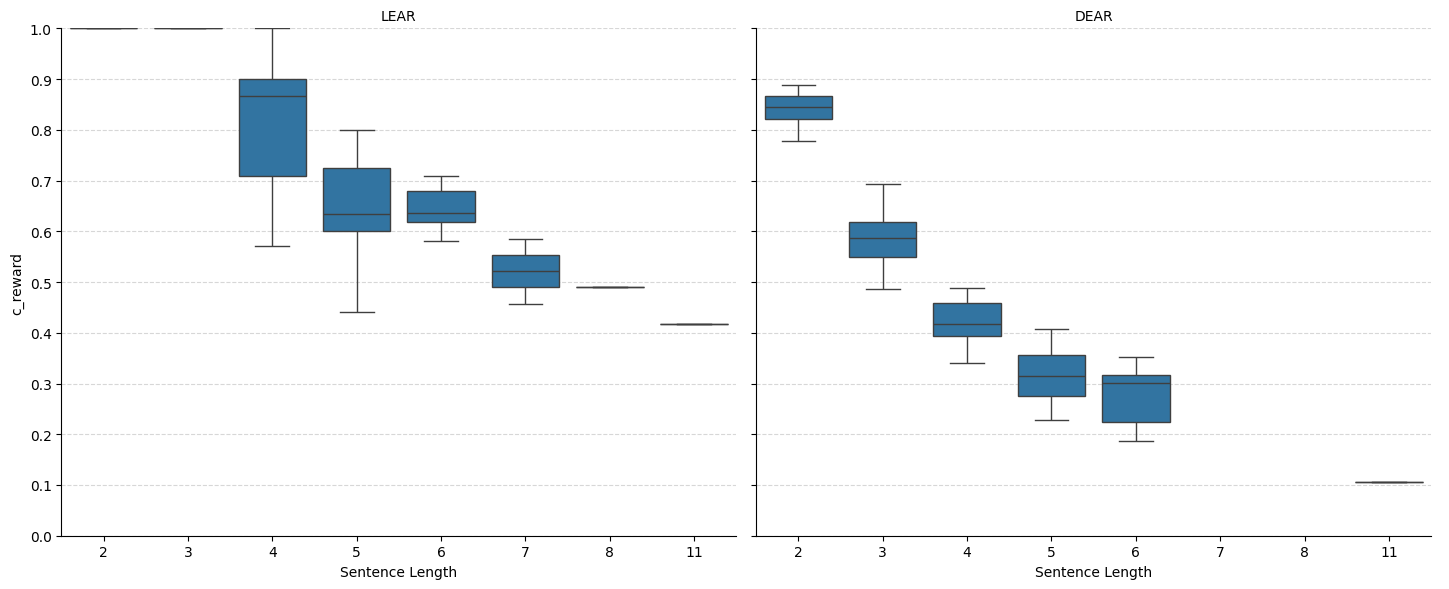

In [63]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'c_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'c_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='c_reward',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Sentence Length", "c_reward")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





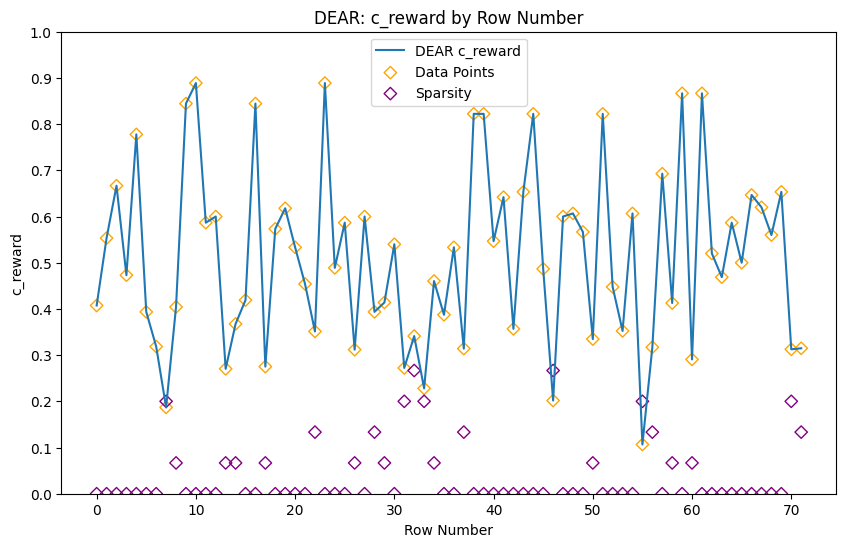

In [52]:
plt.figure(figsize=(10,6))
plt.plot(dear_avg['row_num'], dear_avg['c_reward'], label='DEAR c_reward')

# Orange diamond markers for data points
plt.scatter(dear_avg['row_num'], dear_avg['c_reward'], marker='D', facecolors='none', edgecolors='orange', s=40, label='Data Points')

# Green diamond for c_reward_max
#plt.scatter(dear_avg['row_num'], dear_avg['c_reward_max'], marker='D', facecolors='none', edgecolors='green', s=40, label='c_reward_max')

# Red diamond for c_reward_min
#plt.scatter(dear_avg['row_num'], dear_avg['c_reward_min'], marker='D', facecolors='none', edgecolors='red', s=40, label='c_reward_min')

# Purple diamond for sparsity
plt.scatter(dear_avg['row_num'], dear_avg['sparsity'], marker='D', facecolors='none', edgecolors='purple', s=40, label='Sparsity')

plt.title('DEAR: c_reward by Row Number')
plt.xlabel('Row Number')
plt.ylabel('c_reward')
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])
plt.legend()
plt.show()


In [17]:
# Bin the data into groups of 10 rows by row_num and average c_reward, c_reward_min, c_reward_max
bin_size = 10
dear_avg['bin'] = dear_avg['row_num'] // bin_size

binned = dear_avg.groupby('bin').agg({
    'c_reward': 'mean',
    'c_reward_min': 'mean',
    'c_reward_max': 'mean',
    'sparsity': 'mean'
}).reset_index()

binned


,bin,c_reward,c_reward_min,c_reward_max,sparsity
0,0,0.502590,0.314921,0.778506,0.026667
1,1,0.544322,0.321905,0.866926,0.020000
2,2,0.502254,0.243810,0.887241,0.040000
3,3,0.472098,0.241905,0.813492,0.086667
4,4,0.548274,0.358182,0.904156,0.026667
5,5,0.495926,0.263810,0.771905,0.046667
6,6,0.571287,0.371667,0.955556,0.006667
7,7,0.313704,0.000000,0.606061,0.166667


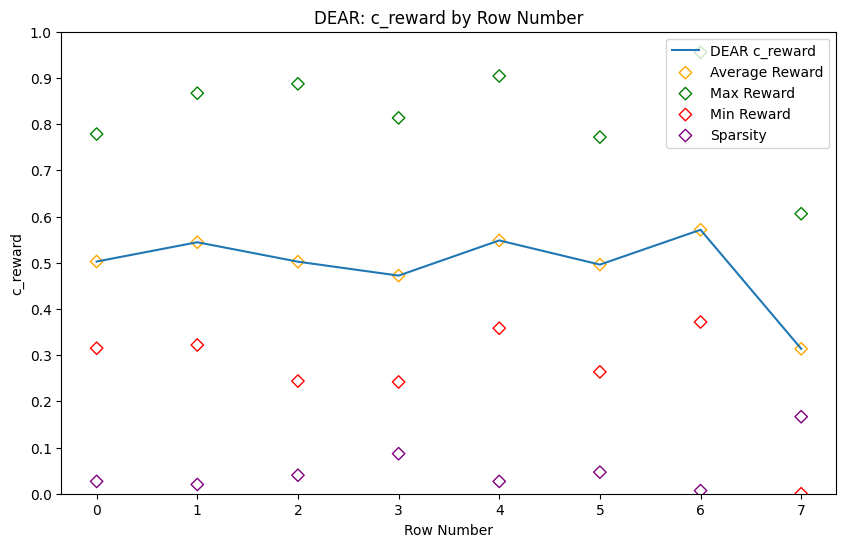

In [18]:
plt.figure(figsize=(10,6))
plt.plot(binned['bin'], binned['c_reward'], label='DEAR c_reward')

# Orange diamond markers for data points
plt.scatter(binned['bin'], binned['c_reward'], marker='D', facecolors='none', edgecolors='orange', s=40, label='Average Reward')

# Green diamond for c_reward_max
plt.scatter(binned['bin'], binned['c_reward_max'], marker='D', facecolors='none', edgecolors='green', s=40, label='Max Reward')

# Red diamond for c_reward_min
plt.scatter(binned['bin'], binned['c_reward_min'], marker='D', facecolors='none', edgecolors='red', s=40, label='Min Reward')

# Purple diamond for sparsity
plt.scatter(binned['bin'], binned['sparsity'], marker='D', facecolors='none', edgecolors='purple', s=40, label='Sparsity')

plt.title('DEAR: c_reward by Row Number')
plt.xlabel('Row Number')
plt.ylabel('c_reward')
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])
plt.legend()
plt.show()
